In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq
from heapq import heappop, heappush
from time import time
from IPython.display import Image as Img
%matplotlib inline

In [6]:
from map import Map
from draw import draw
from CBS import CBS
from Solutions import make_path
from astar import Node, distance, SearchTreePQS

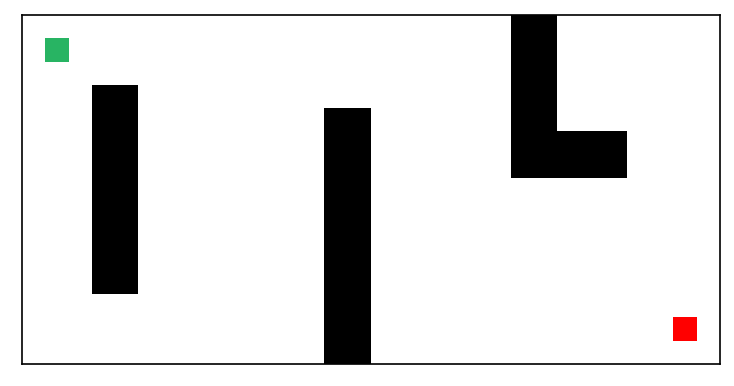

In [8]:
height = 15
width = 30
map_str = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''

test_map = Map()
test_map.read_from_string(map_str, width, height)
start = Node(1, 1)
goal = Node(13, 28)
draw(test_map, start, goal)

In [9]:
# TEST 1
# starts_points = [[0, 0], [0, 1]]
# goal_points = [[2, 2], [10, 1]]
# TEST 2
# starts_points = [[0, 1], [0, 0]]
# goal_points = [[10, 1], [2, 2]]
# TEST 3
# starts_points = [[0, 0], [0, 1], [1, 0]]
# goal_points = [[2, 2], [10, 1], [1, 3]]
# TEST 4
# starts_points = [[0, 0], [0, 1], [1, 0], [1, 1]]
# goal_points = [[2, 2], [10, 1], [1, 3], [10, 10]]
# TEST 5
# starts_points = [[0, 0], [0, 1], [1, 0], [1, 1]]
# goal_points = [[2, 2], [0, 0], [1, 3], [10, 10]]
# # TEST 6
# starts_points = [[0, 0], [0, 1]]
# goal_points = [[0, 1], [0, 0]]
# TEST 7
# starts_points = [[0, 0], [0, 1], [1, 0], [1, 1]]
# goal_points = [[1, 1], [1, 0], [0, 1], [0, 0]]
# TEST 8
# starts_points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 1], [1, 2], [2, 0], [0, 2]]
# goal_points = [[1, 1], [1, 0], [0, 1], [0, 0], [0, 2], [2, 0], [1, 2], [2, 1]]
# TEST 9
starts_points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [0, 2], [1, 2]]
goal_points = [[0, 10], [10, 0], [1, 10], [10, 1], [1, 1], [1, 0], [0, 1], [0, 0]]
# HARD TEST 10
# starts_points = [[3, 0], [3, 1], [3, 2], [0, 3], [1, 3], [2, 3], [0, 0], [0, 1], [1, 0], [1, 1], [2, 1], [2, 2], [1, 2], [2, 0], [0, 2]]
# goal_points = [[0, 0], [1, 1], [0, 1], [1, 0], [2, 0], [0, 2], [6, 6], [6, 7], [7, 6], [7, 7], [8, 8], [8, 7], [7, 8], [10, 10], [10, 0]]

In [10]:
sol = CBS(test_map, starts_points, goal_points, distance, SearchTreePQS)

[0 0 0, 1 0 1, 1 1 2, 2 1 3, 2 2 4]


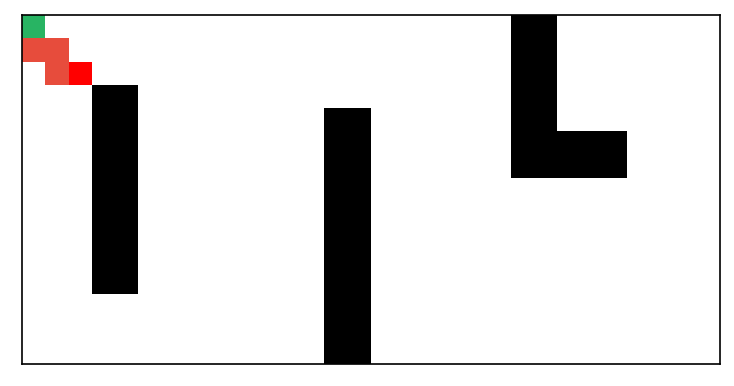

[0 1 0, 0 0 1]


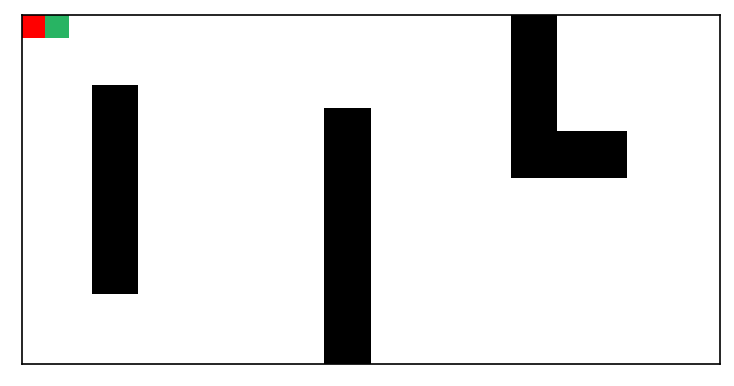

[1 0 0, 1 1 1, 1 2 2, 1 3 3]


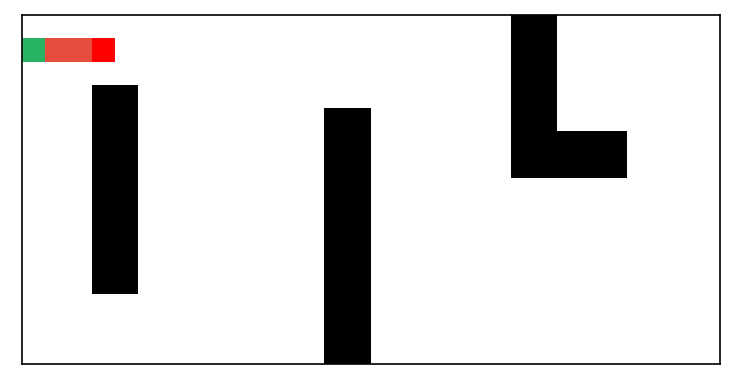

[1 1 0, 1 2 1, 1 3 2, 1 4 3, 1 5 4, 1 6 5, 1 7 6, 1 8 7, 2 8 8, 3 8 9, 4 8 10, 5 8 11, 5 9 12, 5 10 13, 6 10 14, 7 10 15, 8 10 16, 9 10 17, 10 10 18]


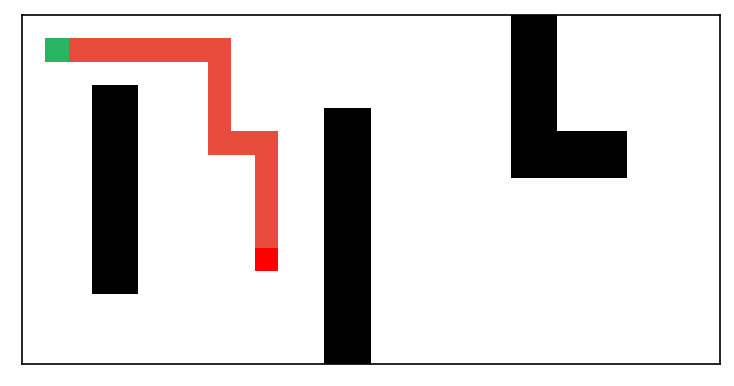

In [11]:
for i in range(len(starts_points)):
    print(sol.get_solution_of_robot(i).get_path())
    draw(test_map, Node(starts_points[i][0], starts_points[i][1]), Node(goal_points[i][0], goal_points[i][1]), sol.get_solution_of_robot(i).get_path())


In [8]:
for i in range(len(starts_points)):
    print(sol.get_solution_of_robot(i).get_path())

[0 0 0, 1 0 1, 1 1 2, 1 2 3, 1 3 4, 1 4 5, 1 5 6, 1 6 7, 1 7 8, 0 7 9, 0 8 10, 0 9 11, 0 10 12]
[0 1 0, 0 0 1, 1 0 2, 2 0 3, 3 0 4, 4 0 5, 5 0 6, 6 0 7, 7 0 8, 8 0 9, 9 0 10, 10 0 11]
[1 0 0, 1 1 1, 1 2 2, 1 3 3, 1 4 4, 1 5 5, 1 6 6, 1 7 7, 1 8 8, 1 9 9, 1 10 10]
[1 1 0, 2 1 1, 3 1 2, 4 1 3, 5 1 4, 6 1 5, 7 1 6, 8 1 7, 9 1 8, 10 1 9]
[2 0 0, 2 0 1, 2 0 2, 2 1 3, 1 1 4]
[2 1 0, 2 2 1, 2 1 2, 1 1 3, 1 0 4]
[0 2 0, 0 3 1, 0 2 2, 0 1 3]
[1 2 0, 0 2 1, 0 1 2, 0 0 3]
